# Text Classification of Movie Plots to Predict Movie Genre

# Business Understanding

Movies are a popular means of entertainment all around the world. With a lot of streaming services and websites available and with more on the horizon, building a predictive model that automatically generates the genre of a movie based on the its plot summary is definitely beneficial as it may reduce the expense of manually tagging the movies.

# Data Understanding

The dataset used in this notebook was obtained from kaggle and it contains movie plot summaries scraped from IMDB. The dataset has 34,886 entries.Information found in the datasetis as follows:

1. Release Year - year of release
2. Title - title of the movies
3. Director - director names associated with the movies
4. Cast - cast name associated with the movies
5. Movie poster
6. Plot - plot summary of the movies
etc

# Data Exploration 

## Import necessary libraries and packages

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
import warnings
import seaborn as sns
# from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, plot_confusion_matrix, confusion_matrix
warnings.filterwarnings('ignore')
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk import word_tokenize, FreqDist
from nltk.stem import WordNetLemmatizer
import spacy
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.text import FreqDistVisualizer


## Read data into pandas

In [134]:
wiki= pd.read_csv('movie-file.csv')

wiki.head()

,year,title,info/directors/0,info/release_date,info/rating,info/genres/0,info/genres/1,info/genres/2,info/genres/3,info/image_url,...,info/actors/1,info/actors/2,info/directors/1,info/genres/4,info/genres/5,info/genres/6,info/genres/7,info/genres/8,info/genres/9,info/directors/2
0,2013,Rush,Ron Howard,2013-09-02T00:00:00Z,8.3,Action,Biography,Drama,Sport,http://ia.media-imdb.com/images/M/MV5BMTQyMDE0...,...,Chris Hemsworth,Olivia Wilde,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013,Prisoners,Denis Villeneuve,2013-08-30T00:00:00Z,8.2,Crime,Drama,Thriller,NaN,http://ia.media-imdb.com/images/M/MV5BMTg0NTIz...,...,Jake Gyllenhaal,Viola Davis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013,The Hunger Games: Catching Fire,Francis Lawrence,2013-11-11T00:00:00Z,NaN,Action,Adventure,Sci-Fi,Thriller,http://ia.media-imdb.com/images/M/MV5BMTAyMjQ3...,...,Josh Hutcherson,Liam Hemsworth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013,Thor: The Dark World,Alan Taylor,2013-10-30T00:00:00Z,NaN,Action,Adventure,Fantasy,NaN,http://ia.media-imdb.com/images/M/MV5BMTQyNzAw...,...,Natalie Portman,Tom Hiddleston,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013,This Is the End,Evan Goldberg,2013-06-03T00:00:00Z,7.2,Comedy,Fantasy,NaN,NaN,http://ia.media-imdb.com/images/M/MV5BMTQxODE3...,...,Jonah Hill,Seth Rogen,Seth Rogen,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Descriptive Statistics

### The release years range from 1901 to 2017 in the dataset

In [135]:
wiki.describe()

,year,info/rating,info/rank,info/running_time_secs
count,4609.000000,4405.000000,4609.000000,4340.000000
mean,2000.880668,6.405625,2479.101540,6477.456221
std,14.310259,1.123058,1444.192322,1173.105934
min,1920.000000,1.700000,2.000000,3660.000000
25%,1996.000000,5.700000,1224.000000,5640.000000
50%,2006.000000,6.500000,2470.000000,6240.000000
75%,2011.000000,7.200000,3726.000000,7080.000000
max,2018.000000,9.300000,5000.000000,16260.000000


### There are 34886 rows and 8 columns 

In [136]:
wiki.shape

(4609, 24)

In [137]:
wiki.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4609 entries, 0 to 4608
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    4609 non-null   int64  
 1   title                   4609 non-null   object 
 2   info/directors/0        4607 non-null   object 
 3   info/release_date       4580 non-null   object 
 4   info/rating             4405 non-null   float64
 5   info/genres/0           4606 non-null   object 
 6   info/genres/1           3945 non-null   object 
 7   info/genres/2           2632 non-null   object 
 8   info/genres/3           1168 non-null   object 
 9   info/image_url          4448 non-null   object 
 10  info/plot               4183 non-null   object 
 11  info/rank               4609 non-null   int64  
 12  info/running_time_secs  4340 non-null   float64
 13  info/actors/0           4606 non-null   object 
 14  info/actors/1           4592 non-null   

# Exploratory Data Analysis

## Movie Distributions by Release Year

Text(0, 0.5, 'Frequency of Occurence')

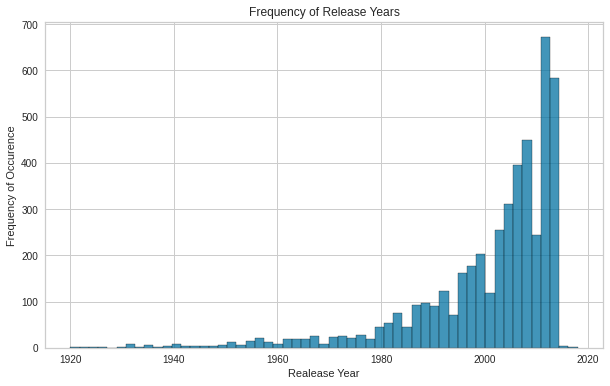

In [138]:
fig, ax = plt.subplots(figsize=(10,6))

sns.histplot(x = wiki['year'])
plt.title('Frequency of Release Years')
plt.xlabel('Realease Year')
plt.ylabel('Frequency of Occurence')


## Subsetting the dataset to include only the entries with a known genre and resetting the index

In [139]:
wiki_df = wiki.loc[wiki['info/genres/0']!='unknown']
wiki_df.reset_index(drop = True, inplace = True)

Checking the number of unique values we have in the genres column

In [140]:
genre=pd.value_counts(wiki_df['info/genres/0'])

print('There are ',len(genre), 'different Genres in the dataset:')
print('-'*50)
print(genre)

There are  22 different Genres in the dataset:
--------------------------------------------------
Comedy         1161
Action         1002
Drama           918
Crime           345
Horror          297
Adventure       270
Animation       210
Biography       182
Thriller         47
Documentary      42
Mystery          39
Sci-Fi           24
Fantasy          24
Family           18
Western          13
Romance           4
Musical           3
Adult             2
Sport             2
Music             1
Film-Noir         1
War               1
Name: info/genres/0, dtype: int64


## Getting the top 6 most commonly occuring genres in the dataset

In [141]:
top_genres = pd.DataFrame(genre[:6]).reset_index()
top_genres.columns = ['genres', 'number_of_movies']
top_genres

,genres,number_of_movies
0,Comedy,1161
1,Action,1002
2,Drama,918
3,Crime,345
4,Horror,297
5,Adventure,270


## Movie distribution of the top six genres in the dataset

Text(0, 0.5, 'frequency')

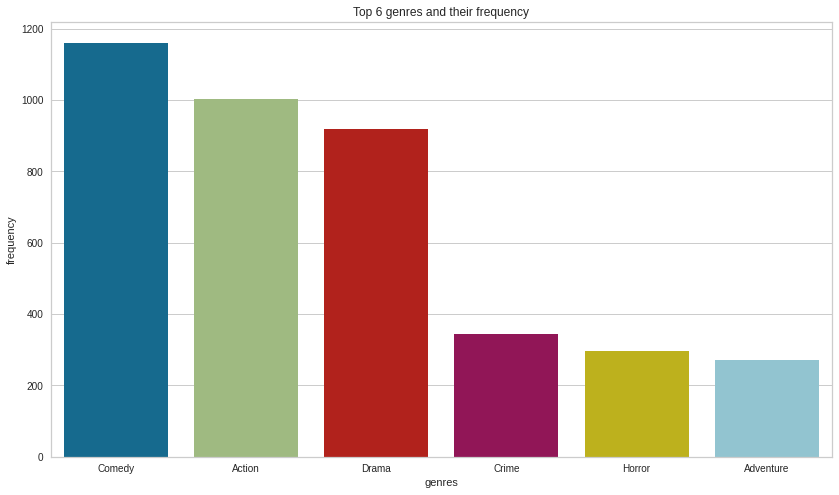

In [142]:
fig, ax = plt.subplots(figsize=(14,8))

sns.barplot(top_genres['genres'], top_genres['number_of_movies'])
plt.title('Top 6 genres and their frequency')
plt.xlabel('genres')
plt.ylabel('frequency')


## Creating separate labels column for the top 6 genres only and assigning the values between 1-6 for drama, comedy,horror, action, thriller and romance, respectively if present in the genre column of the movie (for entries that have only one genre)

In [143]:
conditions = [wiki_df['info/genres/0']=='Drama', wiki_df['info/genres/0']=='Comedy', wiki_df['info/genres/0']=='Horror', wiki_df['info/genres/0']=='Action', wiki_df['info/genres/0']=='Thriller',
             wiki_df['info/genres/0']=='Romance']
choices = [1,2,3,4,5,6]
wiki_df['labels'] = np.select(conditions, choices, 0)

In [144]:
wiki_df.sample(3)

,year,title,info/directors/0,info/release_date,info/rating,info/genres/0,info/genres/1,info/genres/2,info/genres/3,info/image_url,...,info/actors/2,info/directors/1,info/genres/4,info/genres/5,info/genres/6,info/genres/7,info/genres/8,info/genres/9,info/directors/2,labels
2388,1983,Never Say Never Again,Irvin Kershner,1983-10-06T00:00:00Z,6.1,Action,Adventure,Thriller,NaN,http://ia.media-imdb.com/images/M/MV5BMTM1Njgz...,...,Klaus Maria Brandauer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4143,1993,Trois couleurs: Bleu,Krzysztof Kieslowski,1993-01-10T00:00:00Z,7.9,Drama,Music,Mystery,Romance,http://ia.media-imdb.com/images/M/MV5BMjExNzQ5...,...,Julie Delpy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
312,1975,One Flew Over the Cuckoo's Nest,Milos Forman,1975-11-19T00:00:00Z,8.8,Drama,NaN,NaN,NaN,http://ia.media-imdb.com/images/M/MV5BMTk5OTA4...,...,Michael Berryman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [145]:
wiki_df['labels'].value_counts()

0    1180
2    1161
4    1002
1     918
3     297
5      47
6       4
Name: labels, dtype: int64

## Subsetting the wiki_df dataframe to only include the rows that have entries (1-6) in the newly created labels columns (the ones that have only a single genre entry)

In [146]:
 df_to_use = (wiki_df.loc[wiki_df['labels']!=0]).reset_index(drop = True)

In [147]:

df_to_use.head()

,year,title,info/directors/0,info/release_date,info/rating,info/genres/0,info/genres/1,info/genres/2,info/genres/3,info/image_url,...,info/actors/2,info/directors/1,info/genres/4,info/genres/5,info/genres/6,info/genres/7,info/genres/8,info/genres/9,info/directors/2,labels
0,2013,Rush,Ron Howard,2013-09-02T00:00:00Z,8.3,Action,Biography,Drama,Sport,http://ia.media-imdb.com/images/M/MV5BMTQyMDE0...,...,Olivia Wilde,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
1,2013,The Hunger Games: Catching Fire,Francis Lawrence,2013-11-11T00:00:00Z,NaN,Action,Adventure,Sci-Fi,Thriller,http://ia.media-imdb.com/images/M/MV5BMTAyMjQ3...,...,Liam Hemsworth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
2,2013,Thor: The Dark World,Alan Taylor,2013-10-30T00:00:00Z,NaN,Action,Adventure,Fantasy,NaN,http://ia.media-imdb.com/images/M/MV5BMTQyNzAw...,...,Tom Hiddleston,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
3,2013,This Is the End,Evan Goldberg,2013-06-03T00:00:00Z,7.2,Comedy,Fantasy,NaN,NaN,http://ia.media-imdb.com/images/M/MV5BMTQxODE3...,...,Seth Rogen,Seth Rogen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4,2013,Insidious: Chapter 2,James Wan,2013-09-13T00:00:00Z,7.1,Horror,Thriller,NaN,NaN,http://ia.media-imdb.com/images/M/MV5BMTg0OTA5...,...,Barbara Hershey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3


## Table showing Genre label assignments

In [148]:
assigned_label = pd.DataFrame(sorted(list(zip(df_to_use['info/genres/0'].unique(), df_to_use['labels'].unique())), key = lambda x : x[1], reverse = False), columns = ['genres', 'labels'])
pd.merge(assigned_label, top_genres)

,genres,labels,number_of_movies
0,Drama,1,918
1,Comedy,2,1161
2,Horror,3,297
3,Action,4,1002


Text(0, 0.5, 'Frequency of Occurence')

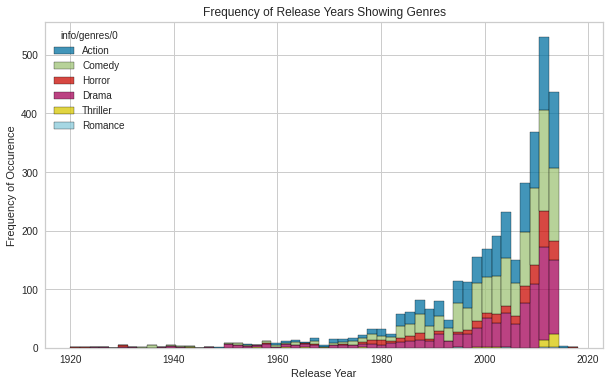

In [149]:
# df_to_use.groupby(['Release Year', 'Genre']).agg('count')
fig, ax = plt.subplots(figsize=(10,6))

sns.histplot(x = 'year', hue = 'info/genres/0', data = df_to_use, multiple = 'stack')
plt.title('Frequency of Release Years Showing Genres')
plt.xlabel('Release Year')
plt.ylabel('Frequency of Occurence')


## Dropping unnecessary columns

In [150]:
df_to_use = df_to_use[["title", "info/plot", "info/genres/0", "labels" ]]






In [151]:
df_to_use.head(2)

,title,info/plot,info/genres/0,labels
0,Rush,A re-creation of the merciless 1970s rivalry b...,Action,4
1,The Hunger Games: Catching Fire,Katniss Everdeen and Peeta Mellark become targ...,Action,4


In [152]:
df_to_use.describe()

,labels
count,3429.000000
mean,2.449111
std,1.209932
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,6.000000


## Cleaning up the 'Plot' column for Analysis

Below we are just looking at a sample of the plot summary

In [153]:
df_to_use['info/plot'][5]

'United Nations employee Gerry Lane traverses the world in a race against time to stop the Zombie pandemic that is toppling armies and governments, and threatening to destroy humanity itself.'

### Total number of words in the Plot summaries

In [154]:
df_to_use = df_to_use.dropna()

def word_length(text):
    num_of_words = 0
    for row in text:
        words = [word for word in row.split(' ')]
        num_of_words += len(words)
    return num_of_words

raw_length = word_length(df_to_use['info/plot'])

### Total number of UNIQUE words in the plot summaries

In [155]:
def unique_word_length(text):
    unique_words = set()
    for row in text:
        words = [word for word in row.split(' ')]
        unique_words.update(words)
    return len(unique_words)

raw_unique_length = unique_word_length(df_to_use['info/plot'])

### Creating our stopwords list and adding some more words that are very common in the summaries. (I ran the freqdist after this and noticed that some of these words were very common but didn't lend us too much meaning so I came back here to add them to the stopwords list). Changing the text to lower case, stopwords removal, lemmatizing.

In [156]:
import nltk
nltk.download('stopwords')

stopwords_list = stopwords.words('english')
stopwords_list += list(string.punctuation)
stopwords_list += ['one', 'two', 'go','goes', 'get', 'also', 'however', 'tells'] 
stopwords_list += [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = re.sub('\d+', ' ', text)
    text = text.strip(' ')
    text = word_tokenize(text)
    text = ' '.join(text)
    text = nlp(text)
    text = [w.lemma_ for w in text]
    text = [w for w in text if w not in stopwords_list]
    text = ' '.join(text)
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Rechecking the summary we looked at above to see if our function worked

In [157]:
new_df = df_to_use.copy(deep = True)

In [158]:
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.2.4/en_core_sci_lg-0.2.4.tar.gz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.2.4/en_core_sci_lg-0.2.4.tar.gz (500.6 MB)


In [159]:
import nltk
nltk.download('punkt')
import spacy.cli
spacy.cli.download("en_core_web_lg")
nlp = spacy.load("en_core_web_lg")

new_df['info/plot'] = new_df['info/plot'].map(lambda x : clean_text(x))
new_df['info/plot'][5]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


'united nations employee gerry lane traverse world race time stop zombie pandemic topple army government threaten destroy humanity'

In [160]:
def word_length(text):
    num_of_words = 0
    for row in text:
        words = [word for word in row.split(' ')]
        num_of_words += len(words)
    return num_of_words

clean_length = word_length(new_df['info/plot'])

In [161]:
def unique_word_length(text):
    unique_words = set()
    for row in text:
        words = [word for word in row.split(' ')]
        unique_words.update(words)
    return len(unique_words)

clean_unique_length = unique_word_length(new_df['info/plot'])

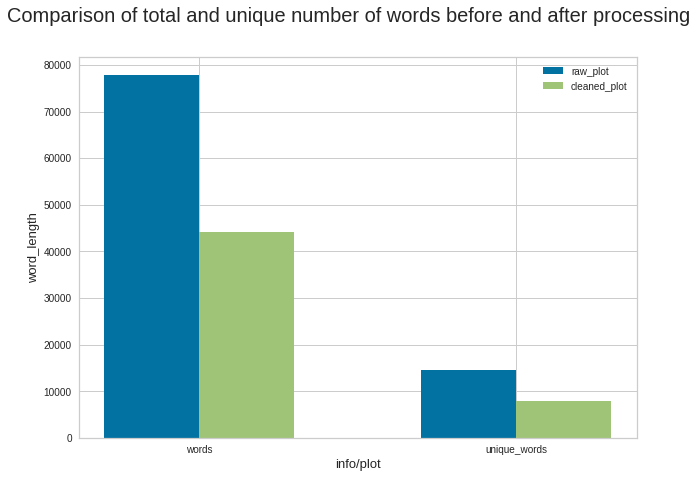

In [162]:
plot_length = [[raw_length, clean_length], [raw_unique_length, clean_unique_length]]
length_df = pd.DataFrame(plot_length, columns = ['num_of_words', 'num_of_unique_words'])
length_df['index'] = ['raw_plot', 'cleaned_plot']

y1 = length_df['num_of_words']
y2 = length_df['num_of_unique_words']

plt.figure(figsize=(10,7))
ind = np.arange(2)

width = 0.3       

# Plotting
plt.bar(ind, y1, width, label='raw_plot')
plt.bar(ind + width, y2, width, label='cleaned_plot')

plt.xlabel('info/plot', size = 13)
plt.ylabel('word_length', size = 13)
plt.suptitle('Comparison of total and unique number of words before and after processing', size = 20)
plt.xticks(ind + width / 2, ('words', 'unique_words'))
plt.legend(loc='best')
plt.show()


In [163]:
length_df

,num_of_words,num_of_unique_words,index
0,77748,44223,raw_plot
1,14645,7939,cleaned_plot


## More EDA

### Distribution of words in plot and movie title for each genre

DRAMA

Frequency Distribution plot showing the 20 most common words in the plot summaries in drama

We can see from the plot that the most common words have to do with family, life, love, etc 

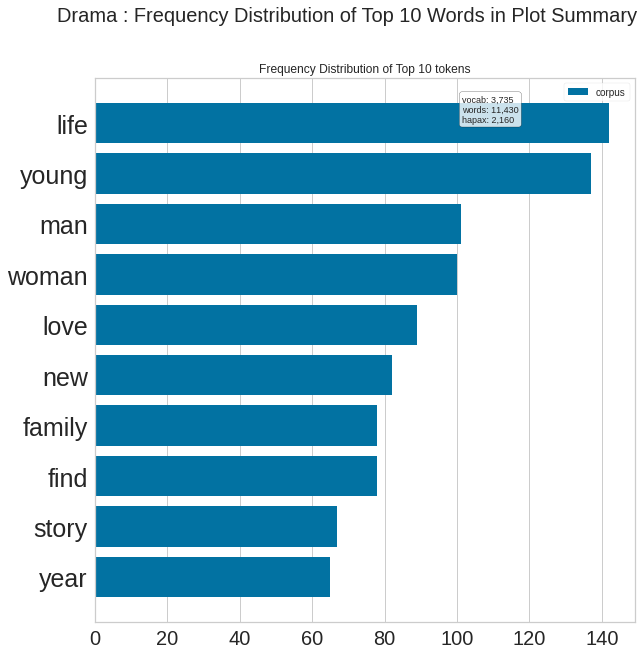

In [164]:
drama_plot = new_df.loc[new_df['labels'] == 1, ['info/plot', 'title']]
drama_plotlist = [x for x in drama_plot['info/plot'].str.split()]
drama_plotlist = list(itertools.chain(*drama_plotlist))

count = CountVectorizer()
docs       = count.fit_transform(drama_plotlist)
features   = count.get_feature_names()


fig = plt.figure(figsize=(10, 10))
plt.suptitle('Drama : Frequency Distribution of Top 10 Words in Plot Summary', size = 20)
plt.yticks(fontsize = 25)
plt.xticks(fontsize = 20)
plt.gcf().subplots_adjust(left=0.15)

visualizer = FreqDistVisualizer(features = features, n=10, orient='h')
visualizer.fit(docs)
visualizer.show()


The wordcloud below shows the 20 most frequent words in drama

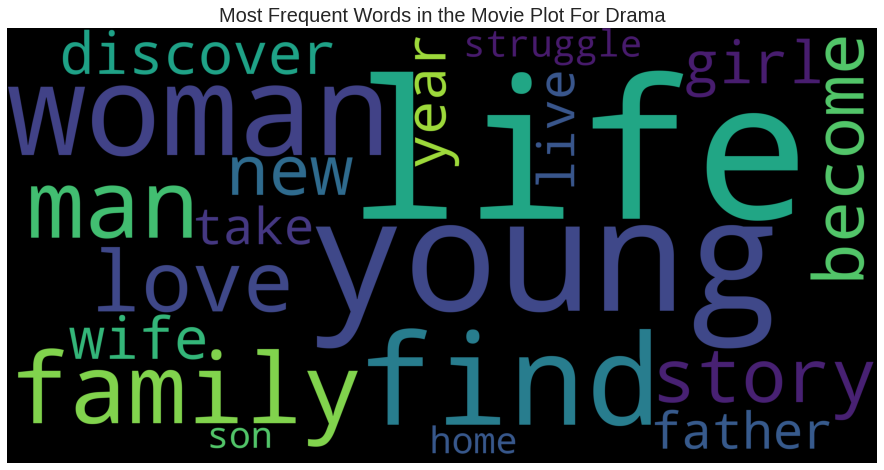

In [165]:
plot_corpus = ' '.join(drama_plotlist)
plot_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', max_words = 20, height=2000, width=4000, random_state = 42, 
                           normalize_plurals = False).generate(plot_corpus)

# Plot the wordcloud
fig, ax = plt.subplots(figsize=(16,8))
plt.imshow(plot_wordcloud)
plt.axis('off')
plt.title('Most Frequent Words in the Movie Plot For Drama', fontsize = 20)
plt.show()


A worldcloud showing the most frequent words in movie titles for drama

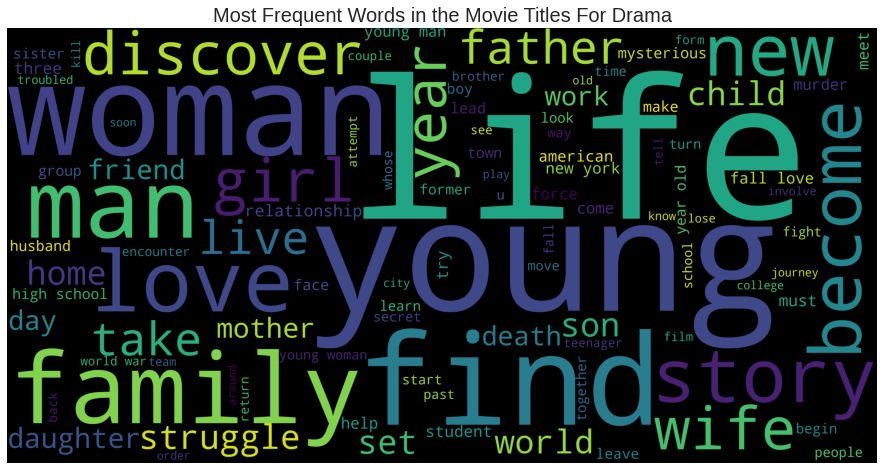

In [166]:
title_corpus = ' '.join(drama_plotlist)
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000, random_state = 42, max_words = 100).generate(title_corpus)

# Plot the wordcloud
fig, ax = plt.subplots(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.title('Most Frequent Words in the Movie Titles For Drama', fontsize = 20)
plt.show()

COMEDY

Frequency Distribution plot showing the 20 most common words in the plot summaries in comedy

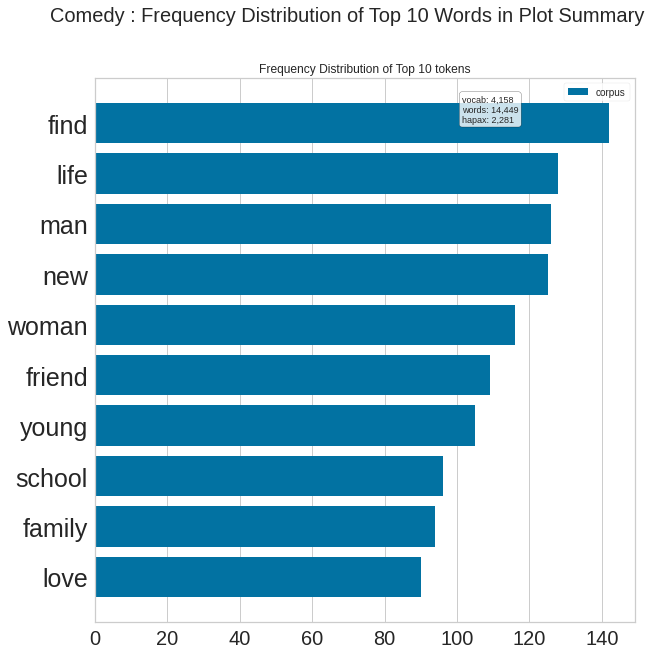

In [167]:
comedy_plot = new_df.loc[new_df['labels'] == 2, ['info/plot', 'title']]
comedy_plotlist = [x for x in comedy_plot['info/plot'].str.split()]
comedy_plotlist = list(itertools.chain(*comedy_plotlist))


count = CountVectorizer()
docs       = count.fit_transform(comedy_plotlist)
features   = count.get_feature_names()


fig = plt.figure(figsize=(10, 10))
plt.suptitle('Comedy : Frequency Distribution of Top 10 Words in Plot Summary', size = 20)
plt.yticks(fontsize = 25)
plt.xticks(fontsize = 20)
plt.gcf().subplots_adjust(left=0.15)

visualizer = FreqDistVisualizer(features = features, n=10, orient='h')
visualizer.fit(docs)
visualizer.show()


The wordcloud below shows the 20 most frequent words above for comedy

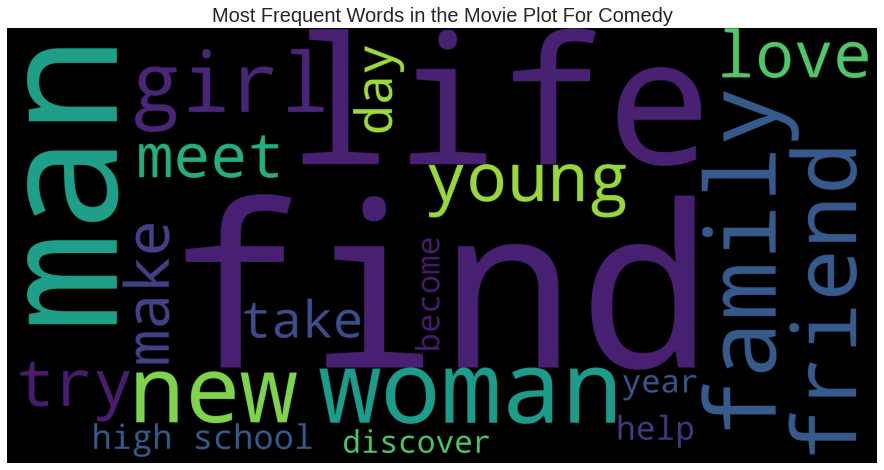

In [168]:
plot_corpus = ' '.join(comedy_plotlist)
plot_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', max_words = 20, height=2000, width=4000, random_state = 42, 
                          normalize_plurals = False).generate(plot_corpus)

# Plot the wordcloud
fig, ax = plt.subplots(figsize=(16,8))
plt.imshow(plot_wordcloud)
plt.axis('off')
plt.title('Most Frequent Words in the Movie Plot For Comedy', fontsize = 20)
plt.show()

A worldcloud showing the most frequent words in movie titles for comedy

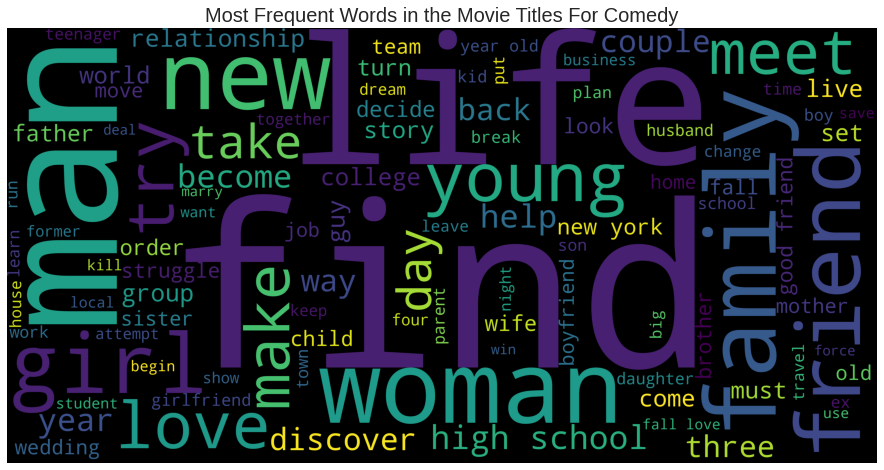

In [169]:
title_corpus = ' '.join(comedy_plotlist)
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000, random_state = 42, max_words = 100).generate(title_corpus)

# Plot the wordcloud
fig, ax = plt.subplots(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.title('Most Frequent Words in the Movie Titles For Comedy', fontsize = 20)
plt.show()


HORROR

Frequency Distribution plot showing the 20 most common words in the plot summaries in horror. Words like kill, deadly and body appear to be very common

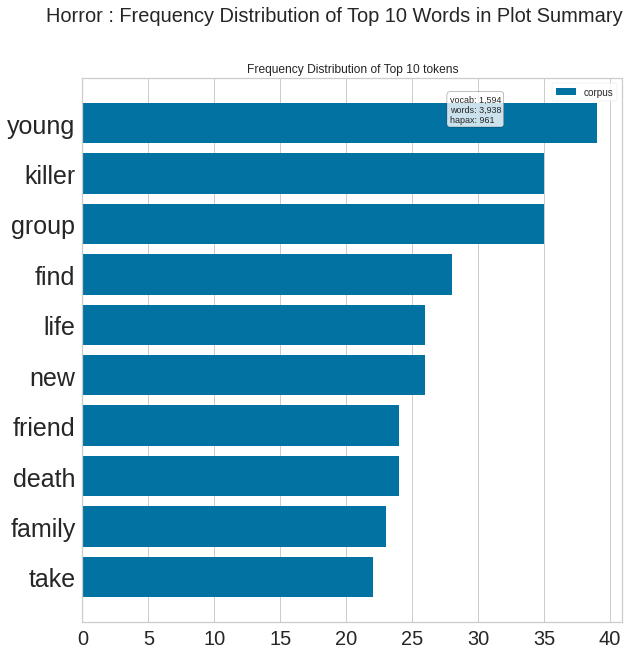

In [170]:
horror_plot = new_df.loc[new_df['labels'] == 3, ['info/plot','title']]
horror_plotlist = [x for x in horror_plot['info/plot'].str.split()]
horror_plotlist = list(itertools.chain(*horror_plotlist))

count = CountVectorizer()
docs       = count.fit_transform(horror_plotlist)
features   = count.get_feature_names()


fig = plt.figure(figsize=(10, 10))
plt.suptitle('Horror : Frequency Distribution of Top 10 Words in Plot Summary', size = 20)
plt.yticks(fontsize = 25)
plt.xticks(fontsize = 20)
plt.gcf().subplots_adjust(left=0.15)

visualizer = FreqDistVisualizer(features = features, n=10, orient='h')
visualizer.fit(docs)
visualizer.show()


The wordcloud below shows the same thing above for horror

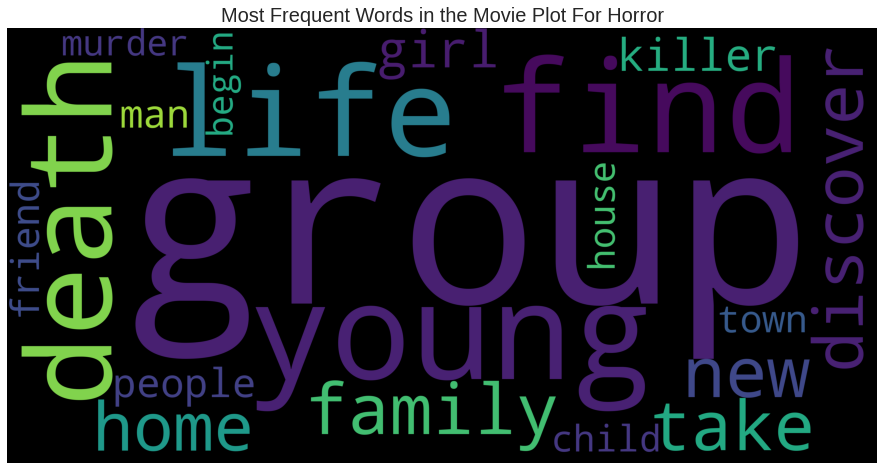

In [171]:
plot_corpus = ' '.join(horror_plotlist)
plot_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', max_words=20, height=2000, width=4000, random_state = 42, 
                           normalize_plurals = False).generate(plot_corpus)

# Plot the wordcloud
fig, ax = plt.subplots(figsize=(16,8))
plt.imshow(plot_wordcloud)
plt.axis('off')
plt.title('Most Frequent Words in the Movie Plot For Horror', fontsize = 20)
plt.show()


A worldcloud showing the most frequent words in movie titles for horror

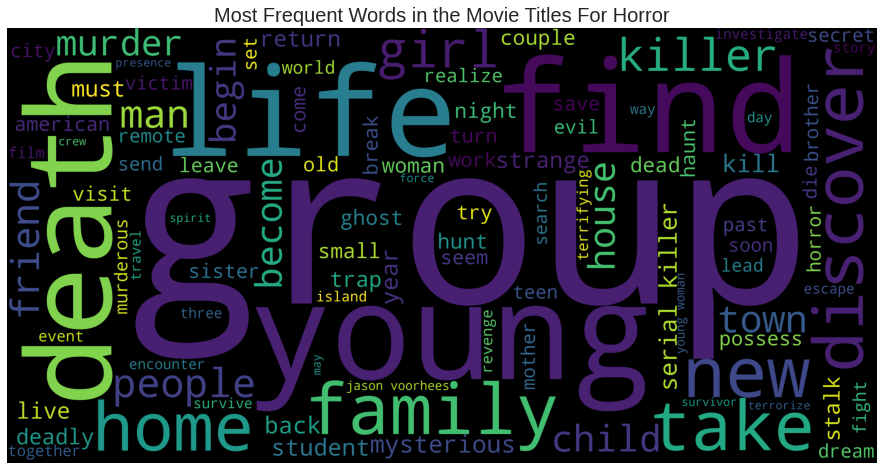

In [172]:
title_corpus = ' '.join(horror_plotlist)
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000, random_state = 42, max_words = 100).generate(title_corpus)

# Plot the wordcloud
fig, ax = plt.subplots(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.title('Most Frequent Words in the Movie Titles For Horror', fontsize = 20)
plt.show()

ACTION

Frequency Distribution plot showing the 20 most common words in the plot summaries in action

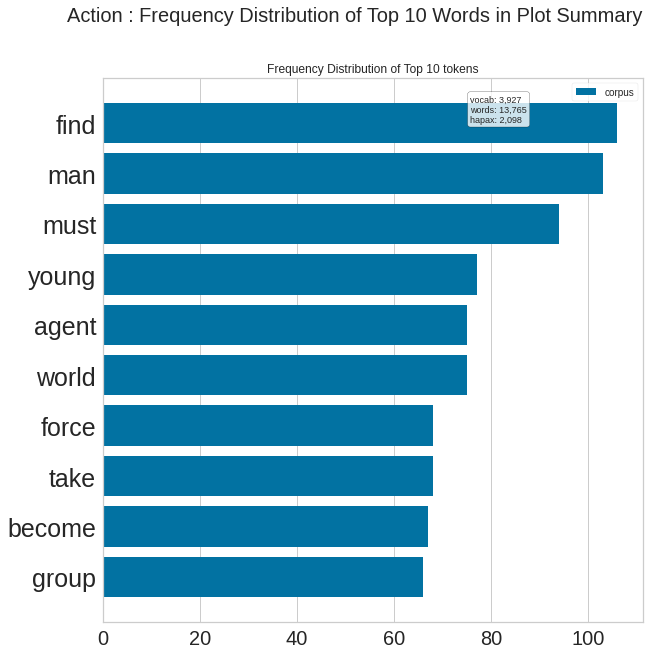

In [173]:
action_plot = new_df.loc[new_df['labels'] == 4, ['info/plot', 'title']]
action_plotlist = [x for x in action_plot['info/plot'].str.split()]
action_plotlist = list(itertools.chain(*action_plotlist))

count = CountVectorizer()
docs       = count.fit_transform(action_plotlist)
features   = count.get_feature_names()


fig = plt.figure(figsize=(10, 10))
plt.suptitle('Action : Frequency Distribution of Top 10 Words in Plot Summary', size = 20)
plt.yticks(fontsize = 25)
plt.xticks(fontsize = 20)
plt.gcf().subplots_adjust(left=0.15)

visualizer = FreqDistVisualizer(features = features, n=10, orient='h')
visualizer.fit(docs)
visualizer.show()

The wordcloud below shows the same thing above for action

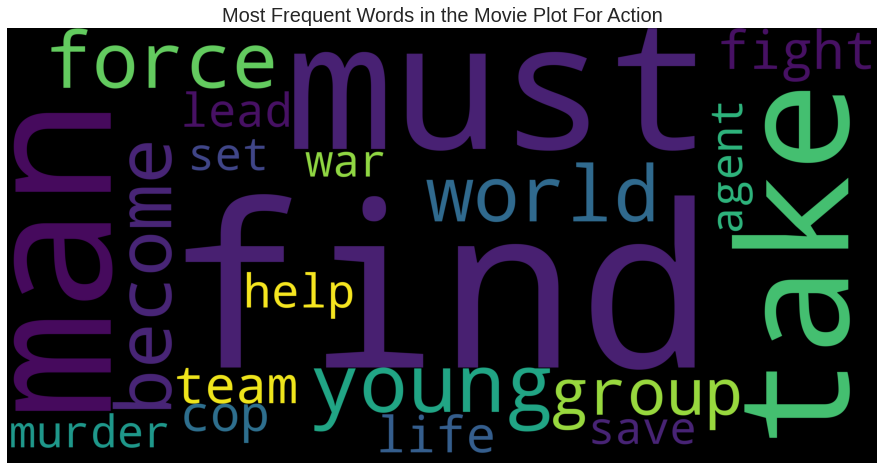

In [174]:
plot_corpus = ' '.join(action_plotlist)
plot_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', max_words=20, height=2000, width=4000, random_state = 42, 
                           normalize_plurals = False).generate(plot_corpus)

# Plot the wordcloud
fig, ax = plt.subplots(figsize=(16,8))
plt.imshow(plot_wordcloud)
plt.axis('off')
plt.title('Most Frequent Words in the Movie Plot For Action', fontsize = 20)
plt.show()

A worldcloud showing the most frequent words in movie titles for action

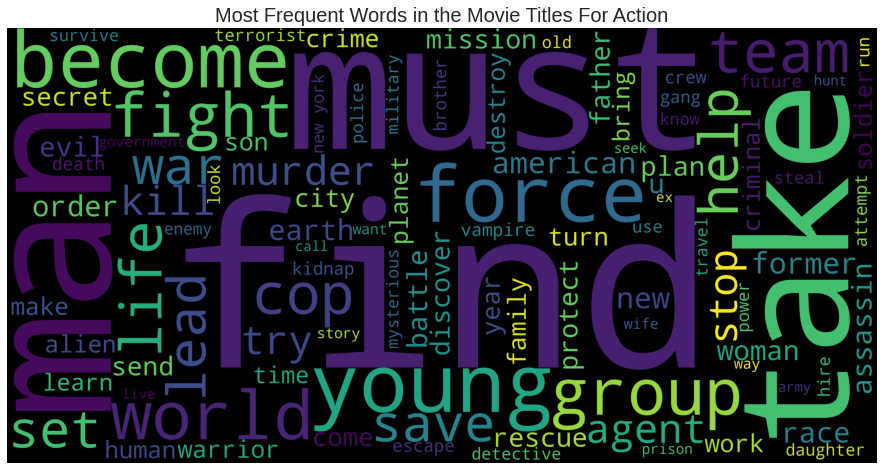

In [175]:
title_corpus = ' '.join(action_plotlist)
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000, random_state = 42, max_words = 100).generate(title_corpus)

# Plot the wordcloud
fig, ax = plt.subplots(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.title('Most Frequent Words in the Movie Titles For Action', fontsize = 20)
plt.show()

THRILLER

Frequency Distribution plot showing the 20 most common words in the plot summaries in thriller

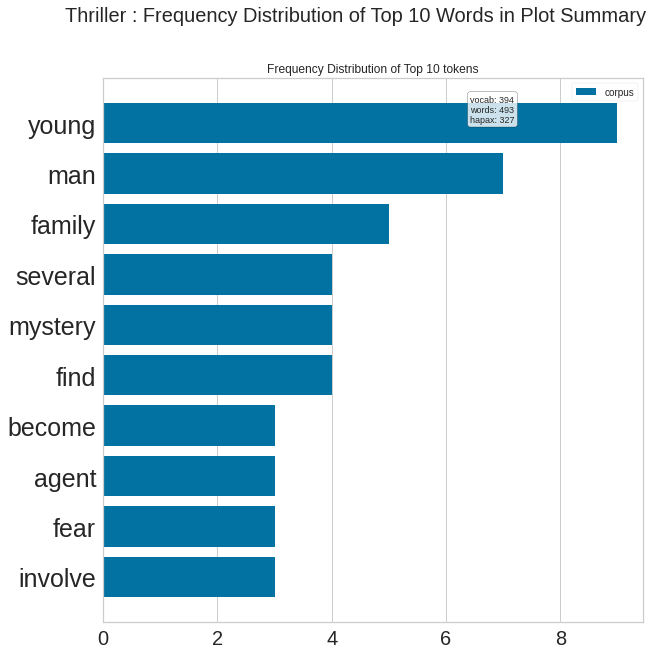

In [176]:
thriller_plot = new_df.loc[new_df['labels'] == 5, ['info/plot', 'title']]
thriller_plotlist = [x for x in thriller_plot['info/plot'].str.split()]
thriller_plotlist = list(itertools.chain(*thriller_plotlist))

count = CountVectorizer()
docs       = count.fit_transform(thriller_plotlist)
features   = count.get_feature_names()


fig = plt.figure(figsize=(10, 10))
plt.suptitle('Thriller : Frequency Distribution of Top 10 Words in Plot Summary', size = 20)
plt.yticks(fontsize = 25)
plt.xticks(fontsize = 20)
plt.gcf().subplots_adjust(left=0.15)

visualizer = FreqDistVisualizer(features = features, n=10, orient='h')
visualizer.fit(docs)
visualizer.show()

The wordcloud below shows the same thing above for thriller

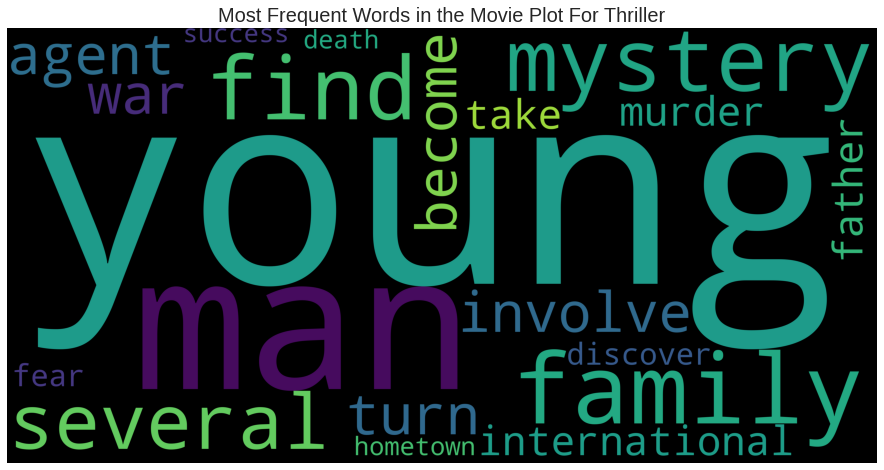

In [177]:
plot_corpus = ' '.join(thriller_plotlist)
plot_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', max_words=20, height=2000, width=4000, random_state = 42, 
                           normalize_plurals = False).generate(plot_corpus)

# Plot the wordcloud
fig, ax = plt.subplots(figsize=(16,8))
plt.imshow(plot_wordcloud)
plt.axis('off')
plt.title('Most Frequent Words in the Movie Plot For Thriller', fontsize = 20)
plt.show()

A worldcloud showing the most frequent words in movie titles for thriller

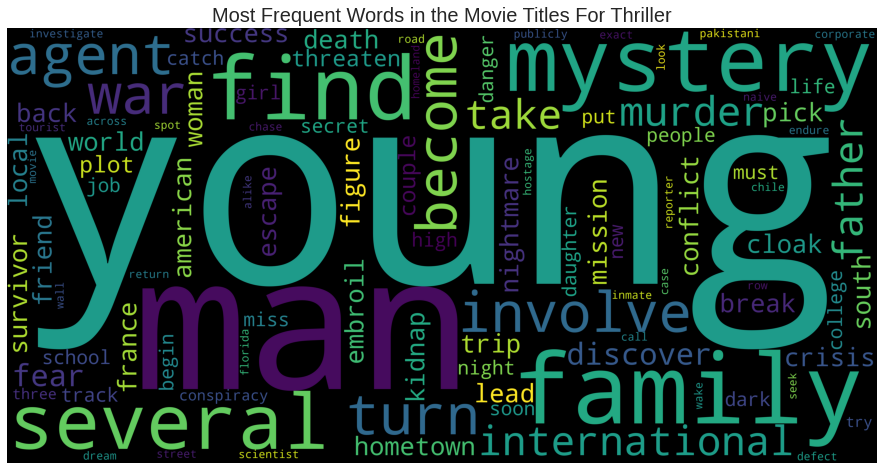

In [178]:
title_corpus = ' '.join(thriller_plotlist)
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000, random_state = 42, max_words = 100).generate(title_corpus)

# Plot the wordcloud
fig, ax = plt.subplots(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.title('Most Frequent Words in the Movie Titles For Thriller', fontsize = 20)
plt.show()

ROMANCE

Frequency Distribution plot showing the 20 most common words in the plot summaries in romance

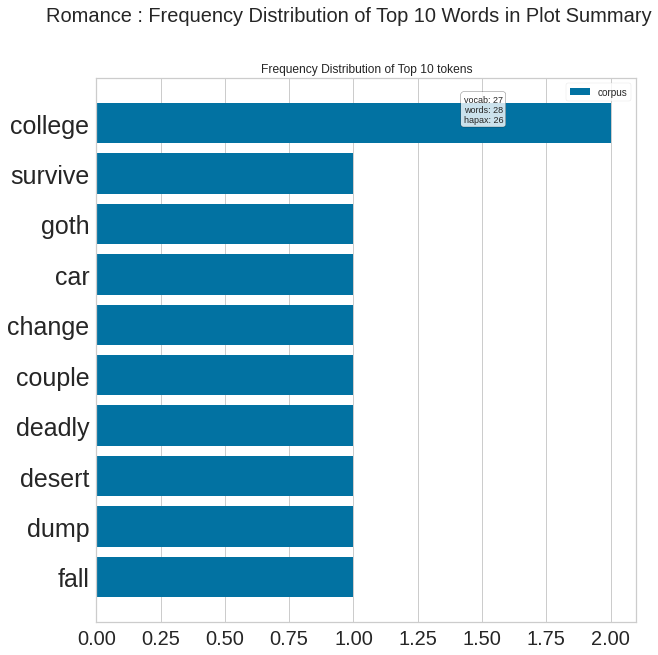

In [179]:
romance_plot = new_df.loc[new_df['labels'] == 6, ['info/plot', 'title']]
romance_plotlist = [x for x in romance_plot['info/plot'].str.split()]
romance_plotlist = list(itertools.chain(*romance_plotlist))

count = CountVectorizer()
docs       = count.fit_transform(romance_plotlist)
features   = count.get_feature_names()


fig = plt.figure(figsize=(10, 10))
plt.suptitle('Romance : Frequency Distribution of Top 10 Words in Plot Summary', size = 20)
plt.yticks(fontsize = 25)
plt.xticks(fontsize = 20)
plt.gcf().subplots_adjust(left=0.15)

visualizer = FreqDistVisualizer(features = features, n=10, orient='h')
visualizer.fit(docs)
visualizer.show()

The wordcloud below shows the same thing above for romance

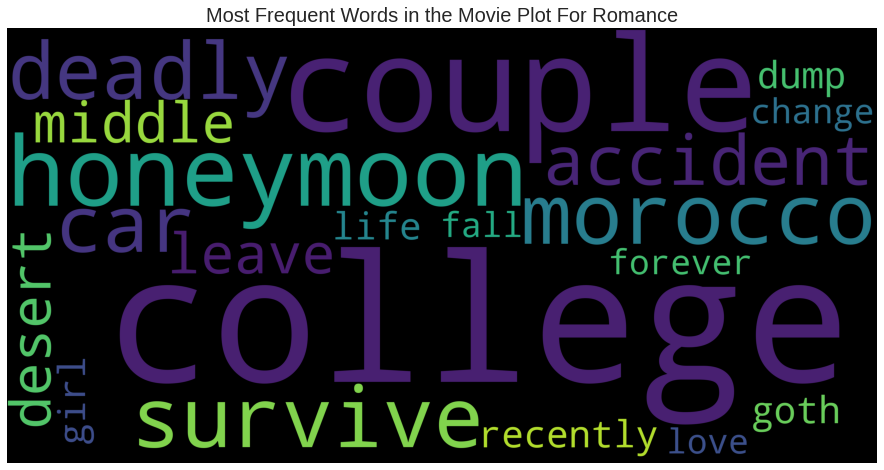

In [180]:
plot_corpus = ' '.join(romance_plotlist)
plot_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', max_words=20, height=2000, width=4000, random_state = 42, 
                           normalize_plurals = False).generate(plot_corpus)

# Plot the wordcloud
fig, ax = plt.subplots(figsize=(16,8))
plt.imshow(plot_wordcloud)
plt.axis('off')
plt.title('Most Frequent Words in the Movie Plot For Romance', fontsize = 20)
plt.show()

A worldcloud showing the most frequent words in movie titles for romance

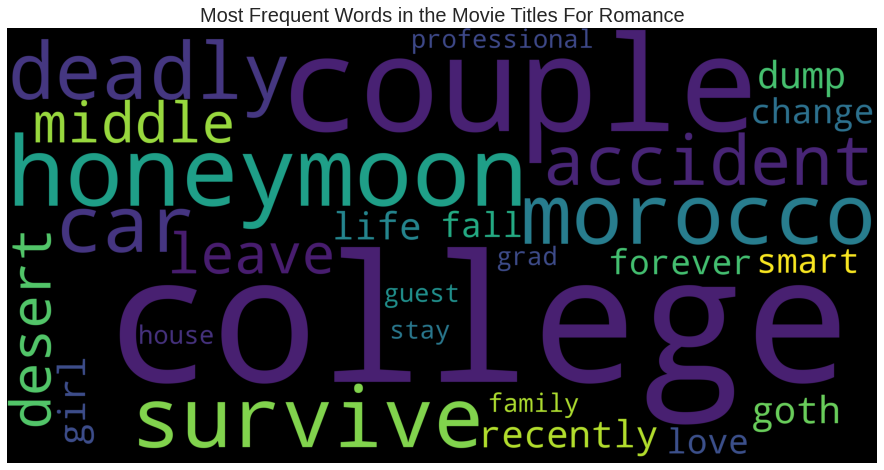

In [181]:
title_corpus = ' '.join(romance_plotlist)
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000, random_state = 42, max_words = 100).generate(title_corpus)

# Plot the wordcloud
fig, ax = plt.subplots(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.title('Most Frequent Words in the Movie Titles For Romance', fontsize = 20)
plt.show()

# Modeling

## Assigning Independent and Target Variables and performing train test split into training and testing set

In [182]:
X = new_df['info/plot']
y = new_df['labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state = 42, stratify = y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2317,) (773,) (2317,) (773,)


## Preprocessing plot column for modeling

## First simple Model using Dummy Classifier

Dummy Classifier just predicting the most frequent class in the dataset gives us a 41% accuracy and we are going to be using that as our baseline accuracy moving forward

In [183]:
dummy_grid = {
    'strategy': ['most_frequent', 'stratified', 'prior', 'uniform', 'constant']
}
dummy = DummyClassifier( random_state = 42)
dummy_gs = GridSearchCV(dummy, param_grid = dummy_grid, cv = 5)
dummy_gs.fit(X_train, y_train)
print(dummy_gs.best_score_)

0.3366425858345125


## Using TfidfVectorizer on the independent variable and testing out the Multinomial Naive Bayes Model, Logistic Regression Model  and Decision Tree

In [184]:
vectorizer = TfidfVectorizer(ngram_range = (1,1), max_df=.85, min_df=15, lowercase=False)
tfidf_Xtr = vectorizer.fit_transform(X_train)

### Grid Search with Multinomial Naive Bayes gave accuracy of ~57%

In [185]:
model_resultstfidf = {}
mnb_grid = {
    'alpha': [0, 0.2, 0.5, 0.8, 1.0],
    'fit_prior' : [True, False],
    'class_prior' : [None, [.4, .3, 0.08, .07, .06, .06], [.167, .167, .167, .167, .167, .167]]
}
mnb = MultinomialNB()
mnb_tfidf_gs = GridSearchCV(mnb, param_grid = mnb_grid, cv = 5)
mnb_tfidf_gs.fit(tfidf_Xtr, y_train)
print(mnb_tfidf_gs.best_score_)

model_resultstfidf['Multinomial Bayes'] = mnb_tfidf_gs.best_score_

0.5684032173977805


### Grid Search with Logistic Regression gave accuracy of ~55%

In [186]:
lr_grid = {
    'penalty' : ['l1', 'l2', 'none'],
    'C' : [1.0, 1e2, 1e4, 1e10],
    'class_weight' : ['balanced', None],
    'solver' : ['lbfgs', 'liblinear'],
    'multi_class' : ['ovr', 'multinomial']
}
logreg = LogisticRegression(random_state = 42)
logreg_tfidf_gs = GridSearchCV(logreg, param_grid = lr_grid, cv = 5)
logreg_tfidf_gs.fit(tfidf_Xtr, y_train)
print(logreg_tfidf_gs.best_score_)
model_resultstfidf['Logistic Regression'] = logreg_tfidf_gs.best_score_

0.5502774260817757


### Grid Search with Decision Tree gave accuracy of ~40%

In [187]:
grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 5, 10],
    'min_samples_split': [1, 5, 10, 20]
}

dt_clf = DecisionTreeClassifier (random_state = 42)
gs_tfidf_tree = GridSearchCV(dt_clf, param_grid = grid, cv = 5)
gs_tfidf_tree.fit(tfidf_Xtr, y_train)

print(gs_tfidf_tree.best_score_)
model_resultstfidf['Decision Tree'] = gs_tfidf_tree.best_score_

0.4009477172860653


## Using Count Vectorizer on the independent variable with Multinomial Naive Bayes Model, Logistic Regression Model  and Decision Tree

In [188]:
countvec = CountVectorizer(ngram_range = (1,3), max_features = 30000)
vec_Xtr = countvec.fit_transform(X_train)

### Grid Search with Multinomial Naive Bayes gave accuracy of ~61%

In [189]:
model_results_cvec = {}
mnb_grid = {
    'alpha': [0, 0.2, 0.5, 0.8, 1.0],
    'fit_prior' : [True, False],
    'class_prior' : [None, [.4, .3, 0.08, .07, .06, .06], [.167, .167, .167, .167, .167, .167]]
}
mnb = MultinomialNB()
mnb_cvec_gs = GridSearchCV(mnb, param_grid = mnb_grid, cv = 5)
mnb_cvec_gs.fit(vec_Xtr, y_train)
print(mnb_cvec_gs.best_score_)
model_results_cvec['Multinomial Bayes'] = mnb_cvec_gs.best_score_

0.6154427645788336


### Grid Search with Logistic Regression gave accuracy of ~59%

In [190]:
lr_grid = {
    'penalty' : ['l1', 'l2', 'none'],
    'C' : [1.0, 1e2, 1e4, 1e10],
    'class_weight' : ['balanced', None],
    'solver' : ['lbfgs', 'liblinear'],
    'multi_class' : ['ovr', 'multinomial']
}
logreg = LogisticRegression(random_state = 42)
logreg_cvec_gs = GridSearchCV(logreg, param_grid = lr_grid, cv = 5)
logreg_cvec_gs.fit(vec_Xtr, y_train)
print(logreg_cvec_gs.best_score_)
model_results_cvec['Logistic Regression'] = logreg_cvec_gs.best_score_

0.5912731809041484


### Grid Search with Decision Tree gave accuracy of ~40%

In [191]:
grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 5, 10],
    'min_samples_split': [1, 5, 10, 20]
}

dt_clf = DecisionTreeClassifier (random_state = 42)
gs_cvec_tree = GridSearchCV(dt_clf, param_grid = grid, cv = 5)
gs_cvec_tree.fit(vec_Xtr, y_train)

print(gs_cvec_tree.best_score_)
model_results_cvec['Decision Tree'] = gs_cvec_tree.best_score_

0.4031047516198704


## SGD Classifier on count_vectorizer-transformed X variable

In [192]:
from sklearn.linear_model import SGDClassifier

In [193]:
grid = {
    'loss' : ['hinge', 'log'],
    'penalty' : ['l2', 'l1'],
    'alpha' : [1e-3, 1e-4, 1e-5],
    'max_iter' : [10, 15, 20],
    'class_weight' : ['balanced', None]
}
sgd = SGDClassifier(random_state=42)
sgd_cvec_gs = GridSearchCV(sgd, param_grid = grid, cv=5)
sgd_cvec_gs.fit(vec_Xtr, y_train)

print(sgd_cvec_gs.best_score_)
model_results_cvec['SGD'] = sgd_cvec_gs.best_score_

0.5878202502420496


In [194]:
sgd_cvec_gs.best_params_

{'alpha': 0.001,
 'class_weight': None,
 'loss': 'log',
 'max_iter': 10,
 'penalty': 'l2'}

# SGD Classifier on tfidf-transformed X variable

In [195]:
grid = {
    'loss' : ['hinge', 'log'],
    'penalty' : ['l2', 'l1'],
    'alpha' : [1e-3, 1e-4, 1e-5],
    'max_iter' : [20, 25, 30],
    'class_weight' : ['balanced', None]
}
sgd = SGDClassifier(random_state=42)
sgd_tfidf_gs = GridSearchCV(sgd, param_grid = grid, cv=5)
sgd_tfidf_gs.fit(tfidf_Xtr, y_train)

print(sgd_tfidf_gs.best_score_)
model_resultstfidf['SGD'] = sgd_tfidf_gs.best_score_

0.5472527370224175


In [196]:
sgd_tfidf_gs.best_params_

{'alpha': 0.001,
 'class_weight': None,
 'loss': 'log',
 'max_iter': 20,
 'penalty': 'l2'}

### Comparison of the Different Models and their Scores

The best model is the one that gave us the best score above which is Grid Search with Multinomial Naive Bayes on the tfidf-transformed X variable which gave us an accuracy score of approximately 61%. Using the '.best_params_' attribute of GridSearchCV, I will obtain the optimal hyparameter values and use it in evaluating the test set.

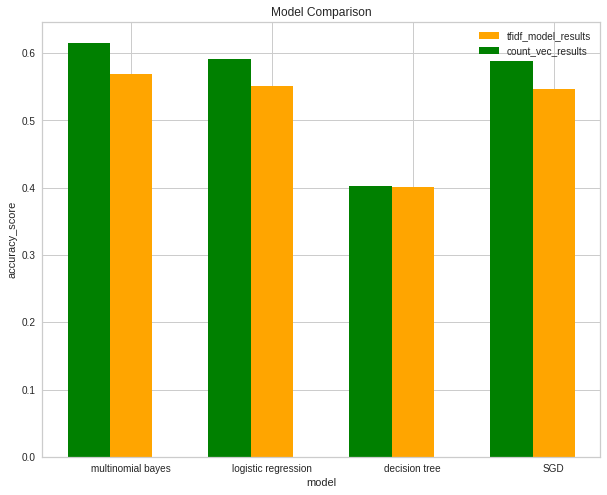

In [197]:
tfidf_model_results = pd.DataFrame(model_resultstfidf.items(), columns=['model', 'accuracy_score'])
count_vec_results = pd.DataFrame(model_results_cvec.items(), columns=['model', 'accuracy_score'])

y1 = tfidf_model_results['accuracy_score']
y2 = count_vec_results['accuracy_score']

fig, ax = plt.subplots(figsize = (10,8))
ind = np.arange(len(tfidf_model_results))

width = 0.3  
plt.bar(ind, y1, width, color = 'orange')
plt.bar(ind - width, y2, width,color = 'green')

plt.title('Model Comparison')
plt.xlabel('model')
plt.ylabel('accuracy_score')
plt.xticks(np.arange(4), ['multinomial bayes', 'logistic regression', 'decision tree', 'SGD'])
plt.legend(['tfidf_model_results', 'count_vec_results'])


### Merging the two tables for use in slides

In [198]:
model_scores = pd.merge(tfidf_model_results, count_vec_results, how = 'left', on = 'model')
model_scores = model_scores.rename(columns = {'accuracy_score_x':'tfidf_score', 'accuracy_score_y':'count_vec_score'})

## Extracting best Parameters in the best model

In [199]:
logreg_cvec_gs.best_params_

{'C': 1.0,
 'class_weight': None,
 'multi_class': 'ovr',
 'penalty': 'none',
 'solver': 'lbfgs'}

# Applying Multinomial Naive Bayes Model Pipeline to the test set

In [211]:
gs_multinominalNB_pipeline= Pipeline([('vect', TfidfVectorizer(ngram_range = (1,1), max_df=.85, min_df=15)),
                            ('clf', GridSearchCV(mnb, param_grid = mnb_grid, cv = 5))])

gs_multinominalNB_pipeline.fit(X_train, y_train)
y_hat_prob=gs_multinominalNB_pipeline.predict_proba(X_test)
y_hat = gs_multinominalNB_pipeline.predict(X_test)
print('Test Accuracy score:', accuracy_score(y_test, y_hat))
print(classification_report(y_test, y_hat))

Test Accuracy score: 0.5653298835705045
              precision    recall  f1-score   support

           1       0.48      0.38      0.43       204
           2       0.55      0.71      0.62       260
           3       0.26      0.07      0.11        68
           4       0.66      0.74      0.70       231
           5       0.00      0.00      0.00         9
           6       0.00      0.00      0.00         1

    accuracy                           0.57       773
   macro avg       0.33      0.32      0.31       773
weighted avg       0.53      0.57      0.54       773



## Logreg Confusion Matrix for Test Set

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

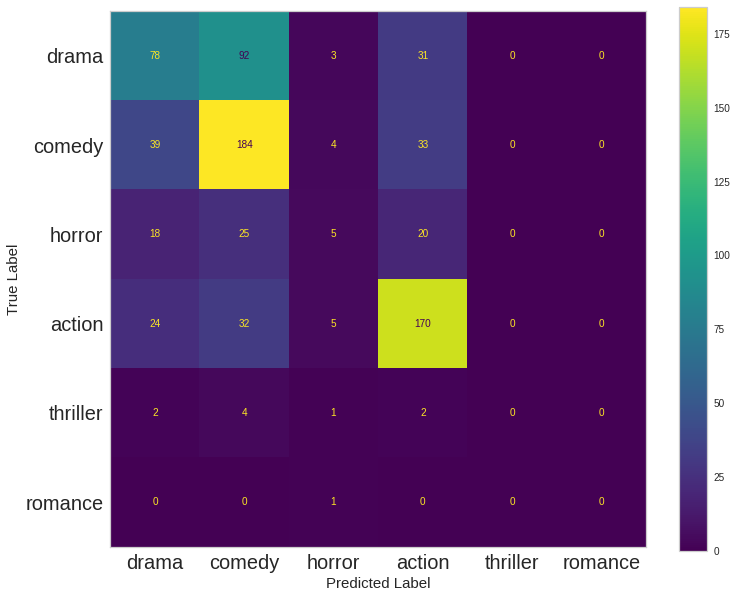

In [212]:
fig, ax = plt.subplots(figsize=(12,10))
plot_confusion_matrix(gs_multinominalNB_pipeline, X_test, y_test, ax = ax, display_labels = ['drama', 'comedy', 'horror', 'action', 'thriller', 'romance'])
plt.grid(None)
plt.xlabel('Predicted Label', size = 15)
plt.ylabel('True Label', size = 15)
plt.xticks(size = 20)
plt.yticks(size = 20)


# Applying SGD Model Pipeline to the test set because the cv scores were so close to those of  Grid Search with Multinomial Naive Bayes 

There is a small decrease in accuracy score by .02%, however it was still pretty good. I will be sticking to the  Grid Search with Multinomial Naive Bayes  becasue that is best overall especially when comparing the confusion matrix

In [202]:
sgd_pipeline = Pipeline([('vect', TfidfVectorizer(ngram_range = (1,1), max_df=.85, min_df=15)),
                            ('clf', SGDClassifier(alpha = 0.0001, loss = 'log', max_iter = 20, penalty = 'l2', class_weight = 'balanced', random_state = 42))])

sgd_pipeline.fit(X_train, y_train)
y_hat_sgd = sgd_pipeline.predict(X_test)
print('Test Accuracy score:', accuracy_score(y_test, y_hat_sgd))
print(classification_report(y_test, y_hat_sgd))

Test Accuracy score: 0.5433376455368694
              precision    recall  f1-score   support

           1       0.45      0.43      0.44       204
           2       0.58      0.57      0.58       260
           3       0.34      0.40      0.36        68
           4       0.69      0.68      0.68       231
           5       0.00      0.00      0.00         9
           6       0.00      0.00      0.00         1

    accuracy                           0.54       773
   macro avg       0.34      0.35      0.34       773
weighted avg       0.55      0.54      0.55       773



 ## SGD Confusion Matrix for Test Set

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

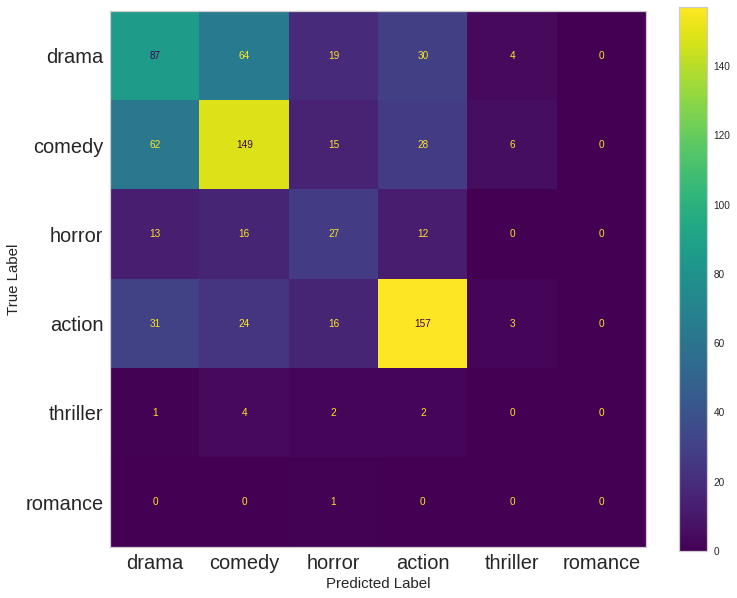

In [213]:
fig, ax = plt.subplots(figsize=(12,10))
plot_confusion_matrix(sgd_pipeline, X_test, y_test, ax = ax, display_labels = ['drama', 'comedy', 'horror', 'action', 'thriller', 'romance'])
plt.grid(None)
plt.xlabel('Predicted Label', size = 15)
plt.ylabel('True Label', size = 15)
plt.xticks(size = 20)
plt.yticks(size = 20)
# fig.savefig('./images/confusionmatrixsgd.png')

### Calculating cosine similarity between thegenres based on the words

In [204]:
genre_plotlist = [['drama', ' '.join(list(set(drama_plotlist)))], ['comedy', ' '.join(list(set(comedy_plotlist)))], 
                  ['horror', ' '.join(list(set(horror_plotlist)))], ['action', ' '.join(list(set(action_plotlist)))],
                 ['thriller', ' '.join(list(set(thriller_plotlist)))], ['romance', ' '.join(list(set(romance_plotlist)))]]
genre_plot_df = pd.DataFrame(genre_plotlist, columns = ['genre_type', 'plot_words'])
genre_plot_df

,genre_type,plot_words
0,drama,kid anticipate gift star desire nearby traditi...
1,comedy,kid anticipate gift mini star retrieve grab fo...
2,horror,kid gift cassette footstep nearby desire cave ...
3,action,kid ransom star retrieve grab wraith footstep ...
4,thriller,kid talk illegally promising senior author pol...
5,romance,life guest middle house dump stay professional...


### The genres have a high cosine similarity with each other (0.46 and above)

In [205]:
from sklearn.metrics.pairwise import cosine_similarity

count_vec = CountVectorizer()
count_matrix = count_vec.fit_transform(genre_plot_df['plot_words'])
cosine_sim = pd.DataFrame(cosine_similarity(count_matrix))
cosine_sim

,0,1,2,3,4,5
0,1.000000,0.493551,0.401230,0.474960,0.248951,0.072427
1,0.493551,1.000000,0.385323,0.455102,0.232823,0.074613
2,0.401230,0.385323,1.000000,0.400491,0.281393,0.091586
3,0.474960,0.455102,0.400491,1.000000,0.235553,0.070634
4,0.248951,0.232823,0.281393,0.235553,1.000000,0.087259
5,0.072427,0.074613,0.091586,0.070634,0.087259,1.000000


# Conclusion

## Results

- Baseline accuracy was 41%
- The tfidf transformed plots performed better during modeling. 
- GridSearchCV helped in narrowing down the best model hyperparameter values.
- The model with the best performance was the Grid Search with Multinomial Naive Bayes  on tfidf transformed plots with the following parameters (although SGD ranked pretty highly as well):
   - C = 1.0
   - class_weight = 'balanced'
   - multi_class = 'ovr'
   - penalty = 'l2'
   - solver = 'liblinear'
- When the above model was used on the test set, it produced an accuracy score of ~61% which a significant increase from the baseline
- The confusion matrix confirms what I suspected when looking at the most common words in the genres. 
- Due to the fact that some of the genres had words in common with another genre, false predictions of those genres were mostly as the genres they had common words with.
- The decision tree models performed the least favorably.